In [ ]:
!pip install alpha_vantage

#Setting up API and testing Data

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Initialize with your API key
ts = TimeSeries(key='Your_key', output_format='pandas')

# Get stock data for a specific stock, e.g., 'META'
data, meta_data = ts.get_daily(symbol='META', outputsize='full')
stock_prices = data['4. close']  # Close price column
stock_prices = stock_prices.astype(float)


In [ ]:
# Get stock data for 'META' (META.)
data, meta_data = ts.get_daily(symbol='META', outputsize='full')
print(data.head())

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2024-04-26  441.460   446.44  431.96    443.29  32691443.0
2024-04-25  421.400   445.77  414.50    441.38  82890741.0
2024-04-24  508.060   510.00  484.58    493.50  37772677.0
2024-04-23  491.250   498.76  488.97    496.10  15079196.0
2024-04-22  489.715   492.01  473.40    481.73  17271125.0


# ARIMA Model Setup and Forecast:


The initial phase of the project employed the Autoregressive Integrated Moving Average (ARIMA) model as a baseline for forecasting stock prices. ARIMA is a widely recognized statistical method designed to analyze and predict time-series data, making it highly applicable to financial markets where data points are sequential and time-dependent.

Rationale for Choosing ARIMA:
1. Handling Non-Stationarity
2. Flexibility in Modeling
3. Simplicity and Efficiency


In [ ]:
!pip install statsmodels

2024-04-29    445.579791
2024-04-30    445.681594
2024-05-01    445.120655
2024-05-02    447.075520
2024-05-03    446.952670
Freq: B, Name: predicted_mean, dtype: float64


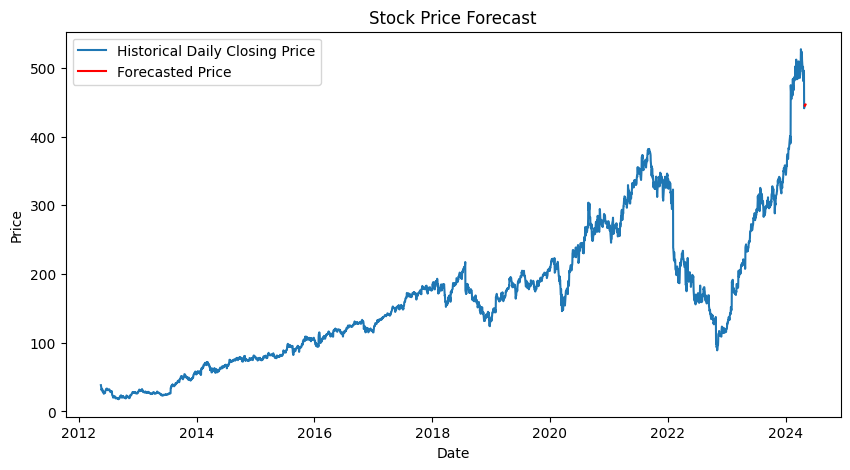

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Get stock data for a specific stock, e.g., 'META'
data, meta_data = ts.get_daily(symbol='META', outputsize='full')
stock_prices = data['4. close']  # Close price column
stock_prices = stock_prices.astype(float)

# Sort the data by date (if not already sorted)
stock_prices.sort_index(inplace=True)

# Set the frequency of the data - assuming daily data excluding weekends
stock_prices.index = pd.to_datetime(stock_prices.index)
stock_prices = stock_prices.asfreq('B')  # 'B' denotes business day frequency

# Filling any missing values that might appear after setting the frequency
stock_prices.fillna(method='ffill', inplace=True)  # Forward fill

# Define and fit the ARIMA model
model = ARIMA(stock_prices, order=(5, 1, 0))  # Adjust these parameters as needed
fitted_model = model.fit()

# Forecasting the next 5 business days
forecast = fitted_model.forecast(steps=5)
print(forecast)

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(stock_prices.index, stock_prices, label='Historical Daily Closing Price')
plt.plot(forecast.index, forecast, color='red', label='Forecasted Price')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

2024-04-29    445.579791
2024-04-30    445.681594
2024-05-01    445.120655
2024-05-02    447.075520
2024-05-03    446.952670
Freq: B, Name: predicted_mean, dtype: float64


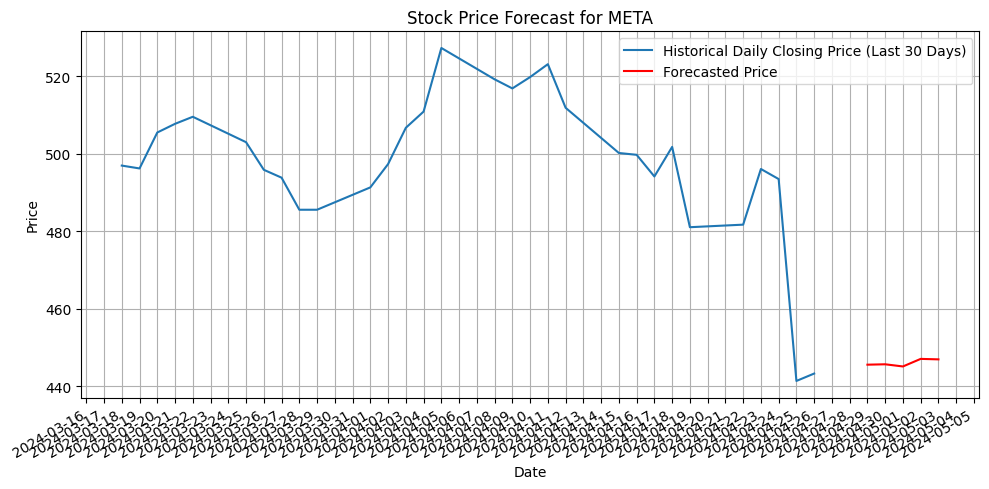

In [ ]:
symbol='META'
# Get the full stock data for a specific stock, e.g., 'META'
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# The '4. close' column has the closing prices
stock_prices = data['4. close'].iloc[::-1]  # Reverse the order to have the oldest prices first

# Ensure the date index is a datetime type and sort it
stock_prices.index = pd.to_datetime(stock_prices.index)
stock_prices.sort_index(inplace=True)

# Set the frequency of the data to business days and fill any missing values
stock_prices = stock_prices.asfreq('B', method='ffill')

# Take the last 30 days for the plot
last_30_days_prices = stock_prices.last('30B')

# Define and fit the ARIMA model on the full dataset
model = ARIMA(stock_prices, order=(5, 1, 0))  # The order may need to be adjusted based on model diagnostics
fitted_model = model.fit()

# Forecast the next 5 business days
forecast = fitted_model.forecast(steps=5)
print(forecast)

# Preparing the dates for the forecast
last_date = stock_prices.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=6, freq='B')[1:]  # exclude the last date of the known data

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(last_30_days_prices.index, last_30_days_prices, label='Historical Daily Closing Price (Last 30 Days)')
plt.plot(forecast_dates, forecast, color='red', label='Forecasted Price')

# Formatting the plot
plt.title(f'Stock Price Forecast for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Setting x-axis major locator and formatter for better date display
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto rotate date labels

plt.tight_layout()
plt.show()

Upon implementing the ARIMA model, forecasted stock prices were generated, providing a benchmark against which the performance of more complex models could be assessed. This step was crucial for establishing a foundational understanding of how well traditional time-series analysis could perform in predicting stock prices before integrating more sophisticated methods and additional variables such as ESG factors.

# Simple Moving Average (SMA):

The Simple Moving Average (SMA) model is an elementary yet powerful tool used in time series forecasting, particularly in stock price analysis. It calculates the average stock price over a specified number of time periods, sliding forward with each new period.

Rationale for Choosing SMA:
1. Trend Identification
2. Simplicity

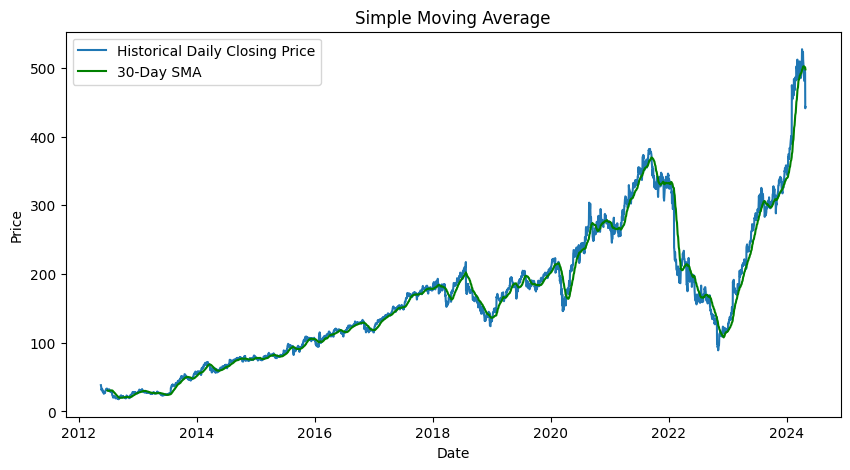

In [ ]:
# Calculate the 30-day simple moving average
sma_30 = stock_prices.rolling(window=30).mean()

# Plotting SMA
plt.figure(figsize=(10,5))
plt.plot(stock_prices.index, stock_prices, label='Historical Daily Closing Price')
plt.plot(sma_30.index, sma_30, color='green', label='30-Day SMA')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


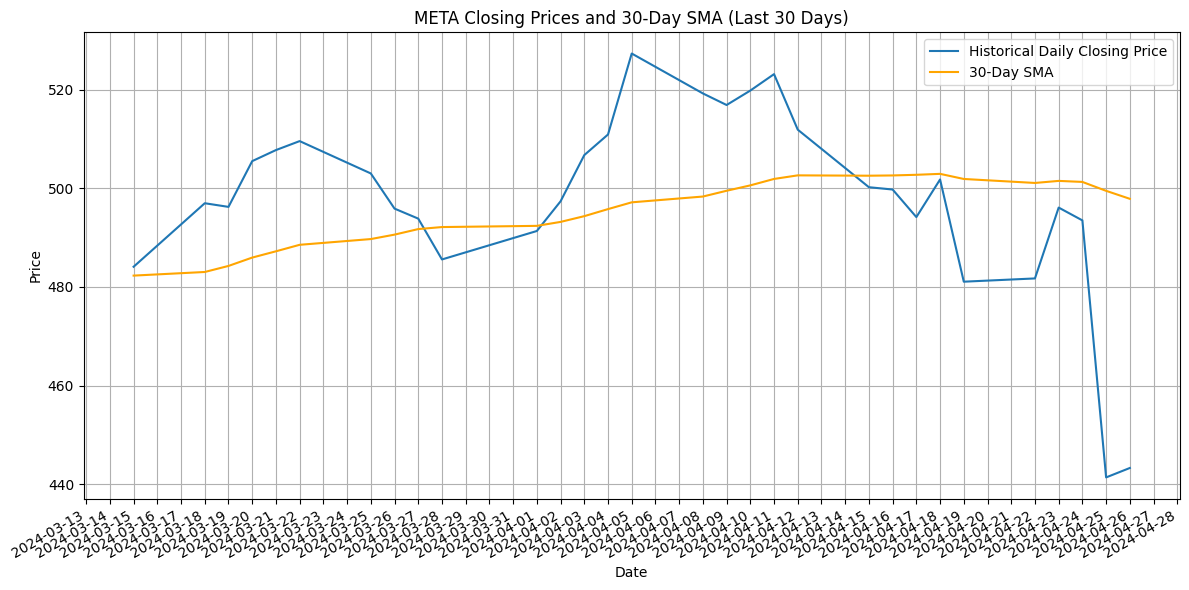

In [ ]:
symbol = 'META'
# Get the stock data
data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')

# The '4. close' column has the closing prices
closing_prices = data['4. close'].iloc[::-1]  # Reverse the order to have the oldest prices first

# Calculate the 30-day SMA
sma_30 = closing_prices.rolling(window=30).mean()

# Select the last 30 days of closing prices and SMA
last_30_days_prices = closing_prices.tail(30)
last_30_days_sma = sma_30.tail(30)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(last_30_days_prices.index, last_30_days_prices, label='Historical Daily Closing Price')
plt.plot(last_30_days_sma.index, last_30_days_sma, label='30-Day SMA', color='orange')

# Formatting the plot
plt.title(f'{symbol} Closing Prices and 30-Day SMA (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Setting x-axis major locator to show one tick per day and formatting date labels
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto rotate date labels

plt.tight_layout()
plt.show()

# Exponential Smoothing:

Exponential Smoothing is a technique used to forecast time series data by assigning exponentially decreasing weights over time. It is more responsive to recent changes in the data than SMA, making it suitable for data with more fluctuations.

Rationale for Choosing Exponential Smoothing:
1. Responsiveness to New Data
2. Flexibility

2024-04-29    441.395821
2024-04-30    439.543081
2024-05-01    437.690341
2024-05-02    435.837601
2024-05-03    433.984861
Freq: B, Name: predicted_mean, dtype: float64


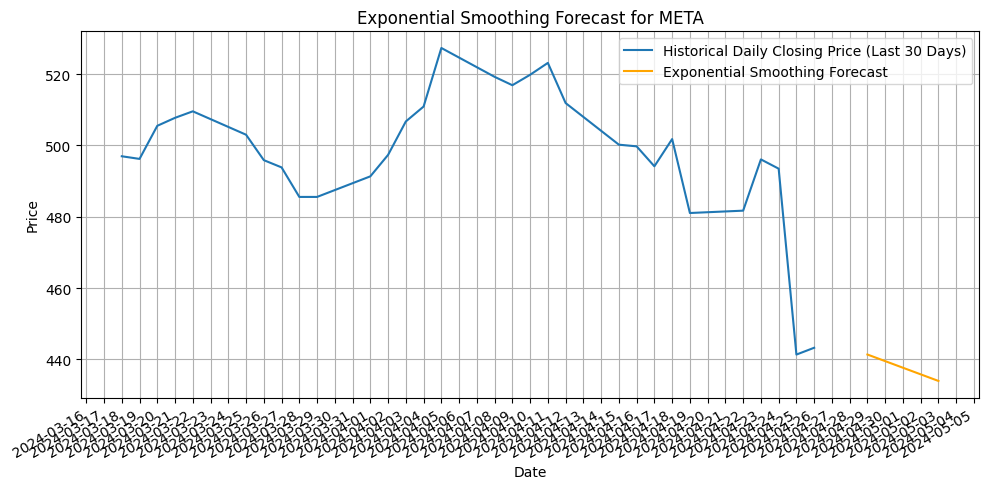

In [ ]:
# Import the ExponentialSmoothing class
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

# Get the stock data
data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')
data.index = pd.to_datetime(data.index)  # Ensure the index is datetime

# Sort the data by date
stock_prices = data['4. close'].sort_index()

# Set the frequency of the index to business days
stock_prices = stock_prices.asfreq('B')

# Filling missing values if there are any
stock_prices.fillna(method='ffill', inplace=True)

# Select the last 30 days of closing prices
last_30_days_prices = stock_prices.last('30B')  # 'B' stands for business day frequency

# Define and fit the Exponential Smoothing model
model = ExponentialSmoothing(last_30_days_prices, trend='add', seasonal=None)
fitted_model = model.fit()

# Forecast the next 5 business days
forecast = fitted_model.forecast(steps=5)
print(forecast)

# Preparing the dates for the forecast
last_date = last_30_days_prices.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=6, freq='B')[1:]  # exclude the last date of the known data

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(last_30_days_prices.index, last_30_days_prices, label='Historical Daily Closing Price (Last 30 Days)')
plt.plot(forecast_dates, forecast, color='orange', label='Exponential Smoothing Forecast')

# Formatting the plot
plt.title(f'Exponential Smoothing Forecast for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Setting x-axis major locator and formatter for better date display
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto rotate date labels

plt.tight_layout()
plt.show()

# Data collection

### Stock data is being collected

In [ ]:
import requests
import pandas as pd
#get api key from alphavantage
# each api key makes 25 requests
# api documentation:https://www.alphavantage.co/documentation/
apikey='Your_key'

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=META&outputsize=full&apikey='+apikey
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'META', '3. Last Refreshed': '2024-04-26', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-04-26': {'1. open': '441.4600', '2. high': '446.4400', '3. low': '431.9600', '4. close': '443.2900', '5. volume': '32691443'}, '2024-04-25': {'1. open': '421.4000', '2. high': '445.7700', '3. low': '414.5000', '4. close': '441.3800', '5. volume': '82890741'}, '2024-04-24': {'1. open': '508.0600', '2. high': '510.0000', '3. low': '484.5800', '4. close': '493.5000', '5. volume': '37772677'}, '2024-04-23': {'1. open': '491.2500', '2. high': '498.7600', '3. low': '488.9700', '4. close': '496.1000', '5. volume': '15079196'}, '2024-04-22': {'1. open': '489.7150', '2. high': '492.0100', '3. low': '473.4000', '4. close': '481.7300', '5. volume': '17271125'}, '2024-04-19': {'1. open': '502.8000', '2. high': '502.8000', '3. low': '475.7300', '4. close': '481.0700', 

In [ ]:
daily_data=pd.DataFrame.from_dict(data['Time Series (Daily)']).T

In [ ]:
daily_data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [ ]:
daily_data.rename(columns={'1. open':'open','2. high': 'high','3. low': 'low','4. close': 'close','5. volume': 'volume'},inplace=True)

In [ ]:
daily_data

open      high       low     close     volume
2024-04-26  441.4600  446.4400  431.9600  443.2900   32691443
2024-04-25  421.4000  445.7700  414.5000  441.3800   82890741
2024-04-24  508.0600  510.0000  484.5800  493.5000   37772677
2024-04-23  491.2500  498.7600  488.9700  496.1000   15079196
2024-04-22  489.7150  492.0100  473.4000  481.7300   17271125
...              ...       ...       ...       ...        ...
2012-05-24   32.9500   33.2100   31.7700   33.0300   50237200
2012-05-23   31.3700   32.5000   31.3600   32.0000   73600000
2012-05-22   32.6100   33.5900   30.9400   31.0000  101786600
2012-05-21   36.5300   36.6600   33.0000   34.0300  168192700
2012-05-18   42.0500   45.0000   38.0000   38.2318  573576400

[3004 rows x 5 columns]

In [ ]:
daily_data=daily_data[::-1]

# Collecting Sentiment data from the news API

In [ ]:
from datetime import datetime, timedelta
import requests
import pandas as pd

apikey = 'Your_key'  # Replace with your actual API key

# Calculate 30 days back from today
time_to = datetime.now()
time_from = time_to - timedelta(days=30)

# Format dates in the required format
time_to = time_to.strftime('%Y%m%dT%H%M')
time_from = time_from.strftime('%Y%m%dT%H%M')

# Sentiment API URL from Alpha Vantage
url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&time_from={time_from}&time_to={time_to}&sort=EARLIEST&symbol=META&limit=1000&apikey={apikey}'

r = requests.get(url)
data = r.json()
print(data)

{'items': '1000', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': "Is It Smart to Take Social Security if I'm Still Working?", 'url': 'https://www.fool.com/retirement/2024/03/30/is-it-smart-to-take-social-security-if-im-still-wo/', 'time_published': '20240330T091800', 'authors': ['Maurie Backman'], 'summary': "You're allowed to collect Social Security even if you have a job. Whether it's a good idea will depend on your circumstances.", 'banner_image': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F770882%2Folder-woman-taking-notes-at-laptop-gettyimages-1407163041.jpg&op=resize&w=700', 'source': 'Motley Fool', 'category_within_source': 'n/a', 'source_domain': 'www.fool.com', 'topics': [{'topic': 'Earnings', 'releva

In [ ]:
data

{'items': '1000',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': "Is It Smart to Take Social Security if I'm Still Working?",
   'url': 'https://www.fool.com/retirement/2024/03/30/is-it-smart-to-take-social-security-if-im-still-wo/',
   'time_published': '20240330T091800',
   'authors': ['Maurie Backman'],
   'summary': "You're allowed to collect Social Security even if you have a job. Whether it's a good idea will depend on your circumstances.",
   'banner_image': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F770882%2Folder-woman-taking-notes-at-laptop-gettyimages-1407163041.jpg&op=resize&w=700',
   'source': 'Motley Fool',
   'category_within_source': 'n/a',
   'source_domain': 'www.fool.com',
   'topics': 

In [ ]:
print(pd.DataFrame.from_dict(data))

    items                         sentiment_score_definition  \
0    1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
1    1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
2    1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
3    1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
4    1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
..    ...                                                ...   
995  1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
996  1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
997  1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
998  1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   
999  1000  x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...   

                            relevance_score_definition  \
0    0 < x <= 1, with a higher score indicating hig...   
1    0 < x <= 1, with a higher score indicating hig...   
2    0 < x <= 1, with a higher score indicating hig...   

## Extracting the Data

### Extracting the data to create them a data frame

In [ ]:
import pandas as pd
from datetime import datetime

all_date = {}
news_data = pd.DataFrame.from_dict(data)  # Ensure 'data' is defined and formatted properly

for feed in news_data['feed']:

    #print(feed)
    date = datetime.strptime(feed['time_published'].split('T')[0], '%Y%m%d').date()
    date_str = str(date)

    if date_str not in all_date:
        all_date[date_str] = {
            'sentiment_score': float(feed['overall_sentiment_score']),
            'sentiment_score_count': 1
        }
        #print(all_date[date_str])
    else:
        all_date[date_str]['sentiment_score'] += float(feed['overall_sentiment_score'])
        all_date[date_str]['sentiment_score_count'] += 1

    for topic in feed['topics']:
        topic_key = topic['topic']
        #print(topic_key)
        if topic_key not in all_date[date_str]:
            all_date[date_str][topic_key] = float(topic['relevance_score'])
            all_date[date_str][topic_key + '_count'] = 1
        else:
            all_date[date_str][topic_key] += float(topic['relevance_score'])
            all_date[date_str][topic_key + '_count'] += 1

print(all_date)
# Converting dictionary to DataFrame
date_data = pd.DataFrame.from_dict(all_date, orient='index')


{'2024-03-30': {'sentiment_score': 37.62475300000001, 'sentiment_score_count': 333, 'Earnings': 41.84654499999997, 'Earnings_count': 72, 'Life Sciences': 13.059522999999999, 'Life Sciences_count': 18, 'Financial Markets': 89.97955000000009, 'Financial Markets_count': 150, 'Manufacturing': 43.892852999999995, 'Manufacturing_count': 67, 'Technology': 71.892854, 'Technology_count': 96, 'Energy & Transportation': 13.976189999999999, 'Energy & Transportation_count': 17, 'Real Estate & Construction': 13.226189, 'Real Estate & Construction_count': 21, 'Finance': 24.059520999999997, 'Finance_count': 38, 'Blockchain': 11.139907000000003, 'Blockchain_count': 25, 'Economy - Monetary': 17.900098, 'Economy - Monetary_count': 41, 'Economy - Macro': 0.6278809999999999, 'Economy - Macro_count': 3, 'Retail & Wholesale': 21.892854, 'Retail & Wholesale_count': 37, 'Mergers & Acquisitions': 1.4208120000000002, 'Mergers & Acquisitions_count': 8, 'IPO': 2.309196, 'IPO_count': 5, 'Economy - Fiscal': 1.08557,

In [ ]:
date_data

sentiment_score  sentiment_score_count    Earnings  \
2024-03-30        37.624753                    333   41.846545   
2024-03-31       103.225390                    652  124.404233   
2024-04-01         3.247553                     15         NaN   

            Earnings_count  Life Sciences  Life Sciences_count  \
2024-03-30            72.0      13.059523                   18   
2024-03-31           205.0      42.249994                   68   
2024-04-01             NaN       1.000000                    1   

            Financial Markets  Financial Markets_count  Manufacturing  \
2024-03-30          89.979550                      150      43.892853   
2024-03-31         233.179619                      398      74.416658   
2024-04-01           4.549338                        6            NaN   

            Manufacturing_count  ...  Economy - Macro  Economy - Macro_count  \
2024-03-30                 67.0  ...         0.627881                      3   
2024-03-31                120.0  ...         0.475557                      3   
2024-04-01                  NaN  ...         0.158519                      1   

            Retail & Wholesale  Retail & Wholesale_count  \
2024-03-30           21.892854                        37   
2024-03-31           81.583321                       147   
2024-04-01            0.500000                         1   

            Mergers & Acquisitions  Mergers & Acquisitions_count       IPO  \
2024-03-30                1.420812                           8.0  2.309196   
2024-03-31                4.482396                          23.0  9.156172   
2024-04-01                     NaN                           NaN  0.682689   

            IPO_count  Economy - Fiscal  Economy - Fiscal_count  
2024-03-30          5          1.085570                       5  
2024-03-31         29          1.578995                       9  
2024-04-01          1          0.158519                       1  

[3 rows x 32 columns]

In [ ]:
temp=date_data

In [ ]:
# average out sentiment data with count columns and then drop count columns
for i in temp.columns:
    if 'count' not in i:
            temp[i]=temp[i]/temp[i+'_count']
            temp.drop(columns=[i+'_count'],inplace=True)


In [ ]:
daily_data

open      high       low     close     volume
2012-05-18   42.0500   45.0000   38.0000   38.2318  573576400
2012-05-21   36.5300   36.6600   33.0000   34.0300  168192700
2012-05-22   32.6100   33.5900   30.9400   31.0000  101786600
2012-05-23   31.3700   32.5000   31.3600   32.0000   73600000
2012-05-24   32.9500   33.2100   31.7700   33.0300   50237200
...              ...       ...       ...       ...        ...
2024-04-22  489.7150  492.0100  473.4000  481.7300   17271125
2024-04-23  491.2500  498.7600  488.9700  496.1000   15079196
2024-04-24  508.0600  510.0000  484.5800  493.5000   37772677
2024-04-25  421.4000  445.7700  414.5000  441.3800   82890741
2024-04-26  441.4600  446.4400  431.9600  443.2900   32691443

[3004 rows x 5 columns]

In [ ]:
# join sentiment data and stock price data
result =  temp.join(daily_data, how='outer')

In [ ]:
result.index

Index(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
       '2012-05-25', '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01',
       ...
       '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
       '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26'],
      dtype='object', length=3006)

In [ ]:
final_data=result

In [ ]:
# fill null values
final_data.fillna(method='ffill',inplace=True)
final_data.fillna(method='bfill',inplace=True)

#Merging the stock data and new data in single dataframe

In [ ]:
final_data

sentiment_score  Earnings  Life Sciences  Financial Markets  \
2012-05-18         0.112987  0.581202       0.725529           0.599864   
2012-05-21         0.112987  0.581202       0.725529           0.599864   
2012-05-22         0.112987  0.581202       0.725529           0.599864   
2012-05-23         0.112987  0.581202       0.725529           0.599864   
2012-05-24         0.112987  0.581202       0.725529           0.599864   
...                     ...       ...            ...                ...   
2024-04-22         0.216504  0.606850       1.000000           0.758223   
2024-04-23         0.216504  0.606850       1.000000           0.758223   
2024-04-24         0.216504  0.606850       1.000000           0.758223   
2024-04-25         0.216504  0.606850       1.000000           0.758223   
2024-04-26         0.216504  0.606850       1.000000           0.758223   

            Manufacturing  Technology  Energy & Transportation  \
2012-05-18       0.655117    0.748884                 0.822129   
2012-05-21       0.655117    0.748884                 0.822129   
2012-05-22       0.655117    0.748884                 0.822129   
2012-05-23       0.655117    0.748884                 0.822129   
2012-05-24       0.655117    0.748884                 0.822129   
...                   ...         ...                      ...   
2024-04-22       0.620139    0.916667                 0.724359   
2024-04-23       0.620139    0.916667                 0.724359   
2024-04-24       0.620139    0.916667                 0.724359   
2024-04-25       0.620139    0.916667                 0.724359   
2024-04-26       0.620139    0.916667                 0.724359   

            Real Estate & Construction   Finance  Blockchain  ...  \
2012-05-18                    0.629819  0.633145    0.445596  ...   
2012-05-21                    0.629819  0.633145    0.445596  ...   
2012-05-22                    0.629819  0.633145    0.445596  ...   
2012-05-23                    0.629819  0.633145    0.445596  ...   
2012-05-24                    0.629819  0.633145    0.445596  ...   
...                                ...       ...         ...  ...   
2024-04-22                    0.694444  1.000000    0.402078  ...   
2024-04-23                    0.694444  1.000000    0.402078  ...   
2024-04-24                    0.694444  1.000000    0.402078  ...   
2024-04-25                    0.694444  1.000000    0.402078  ...   
2024-04-26                    0.694444  1.000000    0.402078  ...   

            Economy - Macro  Retail & Wholesale  Mergers & Acquisitions  \
2012-05-18         0.209294            0.591699                0.177602   
2012-05-21         0.209294            0.591699                0.177602   
2012-05-22         0.209294            0.591699                0.177602   
2012-05-23         0.209294            0.591699                0.177602   
2012-05-24         0.209294            0.591699                0.177602   
...                     ...                 ...                     ...   
2024-04-22         0.158519            0.500000                0.194887   
2024-04-23         0.158519            0.500000                0.194887   
2024-04-24         0.158519            0.500000                0.194887   
2024-04-25         0.158519            0.500000                0.194887   
2024-04-26         0.158519            0.500000                0.194887   

                 IPO  Economy - Fiscal      open      high       low  \
2012-05-18  0.461839          0.217114   42.0500   45.0000   38.0000   
2012-05-21  0.461839          0.217114   36.5300   36.6600   33.0000   
2012-05-22  0.461839          0.217114   32.6100   33.5900   30.9400   
2012-05-23  0.461839          0.217114   31.3700   32.5000   31.3600   
2012-05-24  0.461839          0.217114   32.9500   33.2100   31.7700   
...              ...               ...       ...       ...       ...   
2024-04-22  0.682689          0.158519  489.7150  492.0100  473.4000   
2024-04-23  

#### Generating CSV file

In [ ]:
final_data.to_csv('meta_sentiment.csv')

## Reading the dateset

In [ ]:
data = pd.read_csv('/content/meta_sentiment.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment_score', 'Economy - Monetary',
       'Financial Markets', 'Earnings', 'Mergers & Acquisitions', 'Technology',
       'Finance', 'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'open', 'high', 'low',
       'close', 'volume'],
      dtype='object')

# Making ESG sentiment columns i.e e_sentiment, s_sentiment and g_sentiment

Environment
1. Blockchain: Blockchain technology has significant environmental implications, particularly in terms of energy consumption. Cryptocurrencies like Bitcoin, which are based on blockchain, are known for their high energy usage during the mining process1.
2. Energy & Transportation: This category directly relates to the environment as it involves the production and consumption of energy, as well as transportation systems, both of which have significant environmental impacts.
3. Manufacturing: Manufacturing processes often have significant environmental impacts, including pollution and resource depletion.
4. Real Estate & Construction: These sectors can have significant environmental impacts, including land use changes, resource consumption, and waste generation.

Social
1. Earnings: Earnings relate to income and wealth distribution, which are key social issues.
2. Life Sciences: This field includes healthcare and biotechnology, which have significant social implications in terms of health outcomes and ethical considerations.
3. Retail & Wholesale: These sectors are part of the consumer economy and relate to social issues such as consumer behavior and employment.
4. Technology: Technology has significant social implications, including impacts on communication, privacy, and employment.

Government
1. IPO: Initial Public Offerings (IPOs) are regulated by government entities like the Securities and Exchange Commission in the U.S., making them a government aspect.
2. Mergers & Acquisitions: These are also regulated by government entities to prevent anti-competitive practices.
3. Financial Markets: Financial markets are heavily regulated by government entities to maintain stability and protect consumers.
4. Economy - Fiscal Policy (e.g., tax reform, government spending): Fiscal policy is a direct function of government, involving decisions about government spending and taxation.
5. Economy - Monetary Policy (e.g., interest rates, inflation): Monetary policy is also a direct function of government, typically managed by a central bank.
6. Economy - Macro/Overall: The overall economy is influenced by government policies and regulations.
7. Finance: While finance has social and environmental aspects, it is also heavily regulated by government entities, making it a government aspect as well.






In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load and preprocess the data

In [9]:
data = pd.read_csv('/content/meta_sentiment.csv')
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [10]:
# Fill missing data
data = data.fillna(method='ffill').fillna(method='bfill')

In [11]:
data.head()

sentiment_score  Economy - Monetary  Financial Markets  Earnings  \
date                                                                           
2022-01-03        -0.123265            0.414848           0.497703  0.656845   
2022-01-04        -0.123265            0.414848           0.497703  0.656845   
2022-01-05        -0.123265            0.414848           0.497703  0.656845   
2022-01-06        -0.123265            0.414848           0.497703  0.656845   
2022-01-07        -0.123265            0.414848           0.497703  0.656845   

            Mergers & Acquisitions  Technology   Finance  \
date                                                       
2022-01-03                0.158519    0.686458  0.676042   
2022-01-04                0.158519    0.686458  0.676042   
2022-01-05                0.158519    0.686458  0.676042   
2022-01-06                0.158519    0.686458  0.676042   
2022-01-07                0.158519    0.686458  0.676042   

            Real Estate & Construction  Energy & Transportation  \
date                                                              
2022-01-03                        0.44                     0.67   
2022-01-04                        0.44                     0.67   
2022-01-05                        0.44                     0.67   
2022-01-06                        0.44                     0.67   
2022-01-07                        0.44                     0.67   

            Economy - Fiscal  ...  Manufacturing  Blockchain  Life Sciences  \
date                          ...                                             
2022-01-03          0.158519  ...       0.571212    0.445805       0.466667   
2022-01-04          0.158519  ...       0.571212    0.445805       0.466667   
2022-01-05          0.158519  ...       0.571212    0.445805       0.466667   
2022-01-06          0.158519  ...       0.571212    0.445805       0.466667   
2022-01-07          0.158519  ...       0.571212    0.445805       0.466667   

                 IPO  Economy - Macro     open      high       low   close  \
date                                                                         
2022-01-03  0.158519         0.280378  338.295  341.0816  337.1900  338.54   
2022-01-04  0.158519         0.280378  339.950  343.0854  331.8711  336.53   
2022-01-05  0.158519         0.280378  333.020  335.7600  323.8400  324.17   
2022-01-06  0.158519         0.280378  322.820  339.1650  322.7200  332.46   
2022-01-07  0.158519         0.280378  332.740  337.0000  328.8801  331.79   

              volume  
date                  
2022-01-03  14562849  
2022-01-04  15997974  
2022-01-05  20564521  
2022-01-06  27962809  
2022-01-07  14722020  

[5 rows x 21 columns]

#EDA

#### Time Series Plot for Sentiment Score and Close Price:

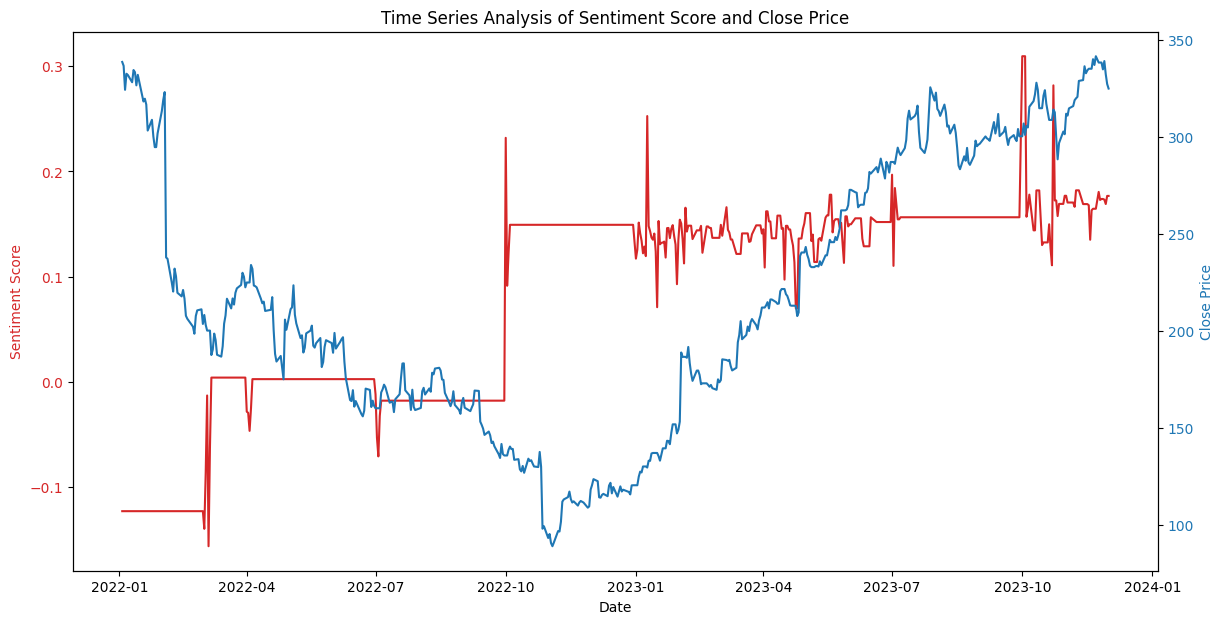

In [4]:
# Plotting sentiment score and closing price
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(data.index, data['sentiment_score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Close Price', color=color)
ax2.plot(data.index, data['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Time Series Analysis of Sentiment Score and Close Price')
plt.show()

Here's the time series plot showing both the overall sentiment score and the closing price over time. The sentiment score is shown in red, and the closing price is in blue.

This visualization can help you analyze how changes in sentiment might correlate with changes in market price. For instance, significant drops or increases in sentiment might precede similar movements in the market.

#### Correlation Heatmap:

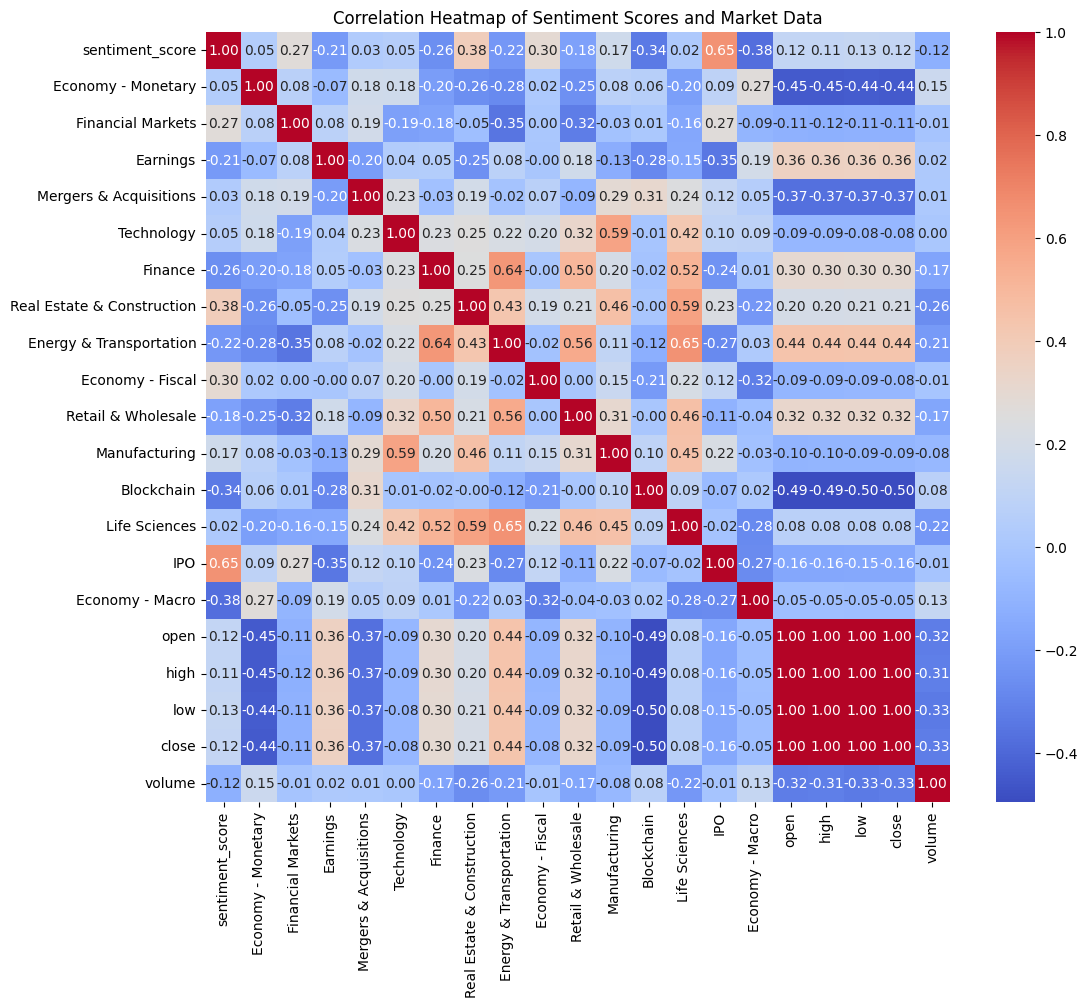

In [5]:
import seaborn as sns
import numpy as np

# Select columns that are numerical
correlation_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Sentiment Scores and Market Data')
plt.show()


Here's the correlation heatmap of sentiment scores and market data. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. This visualization can help identify which factors are most closely related.

####Distribution Plots for Selected Sentiment Scores:

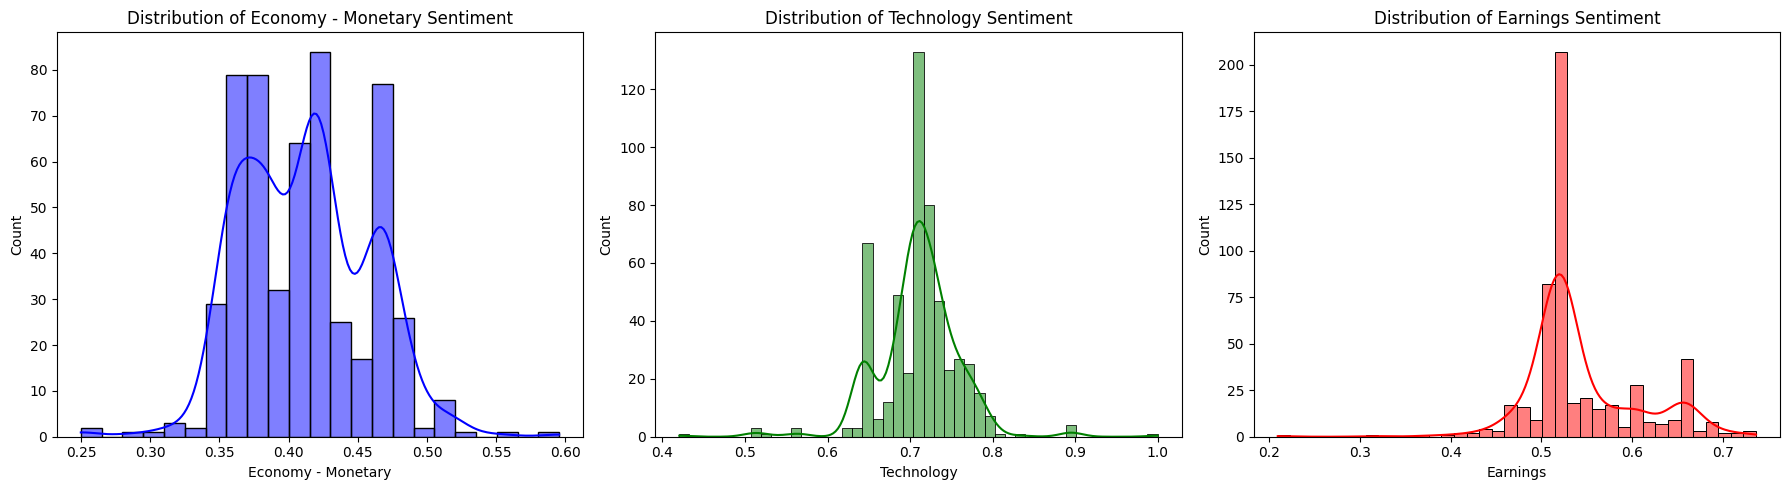

In [6]:
# Distribution plots for 'Economy - Monetary', 'Technology', 'Earnings'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Economy - Monetary'], kde=True, color='blue')
plt.title('Distribution of Economy - Monetary Sentiment')

plt.subplot(1, 3, 2)
sns.histplot(data['Technology'], kde=True, color='green')
plt.title('Distribution of Technology Sentiment')

plt.subplot(1, 3, 3)
sns.histplot(data['Earnings'], kde=True, color='red')
plt.title('Distribution of Earnings Sentiment')

plt.tight_layout()
plt.show()


Here are the distribution plots for three different sentiment scores:

1. Economy - Monetary Sentiment: Displayed in blue.
2. Technology Sentiment: Displayed in green.
3. Earnings Sentiment: Displayed in red.

These plots show the frequency distribution of each sentiment score, helping us understand the typical values and variability within each theme. For example, you can see whether a sentiment tends to be mostly positive, negative, or neutral.

#### Scatter Plot of Trading Volume vs. Close Price:

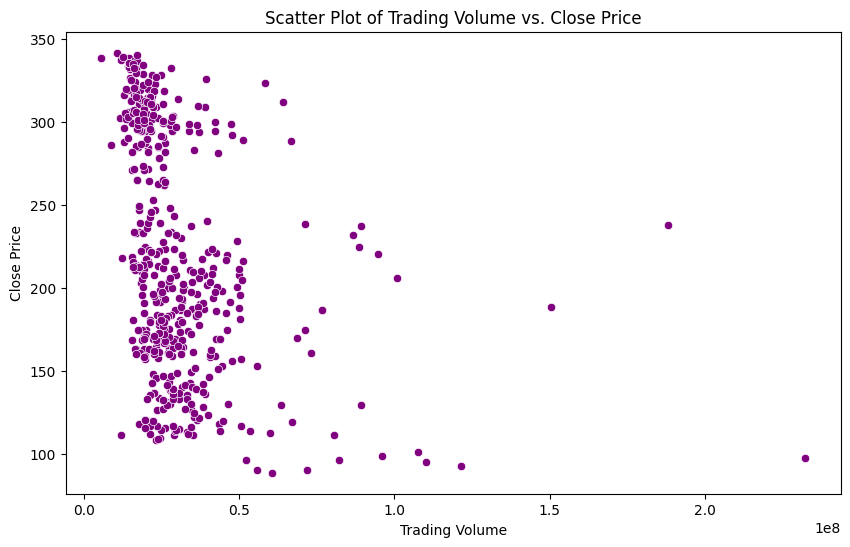

In [7]:
# Scatter plot of volume and close price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='volume', y='close', color='purple')
plt.title('Scatter Plot of Trading Volume vs. Close Price')
plt.xlabel('Trading Volume')
plt.ylabel('Close Price')
plt.show()


Here's the scatter plot showing the relationship between trading volume and the closing price. This plot can help identify any patterns or trends, such as whether higher volumes are associated with certain price levels.

From this scatter plot, we can visually assess the spread and concentration of data points, giving us insight into how these two variables might interact.



#### Calculating percentage changes for different time frames before differencing

In [12]:
# Calculate percentage changes for different time frames before differencing
for days in [3, 7, 30]:
    data[f'close_pct_change_{days}d'] = data['close'].pct_change(periods=days)
    data[f'sentiment_score_change_{days}d'] = data['sentiment_score'].diff(periods=days)

In [13]:
# First differencing to enforce stationarity
data_diff = data.diff().dropna()

# Aggregate sentiment scores into categories in the differenced data

In [14]:

data_diff['e_sentiment'] = (data_diff['Blockchain'] + data_diff['Energy & Transportation'] +
                            data_diff['Manufacturing'] + data_diff['Real Estate & Construction']) / 4
data_diff['s_sentiment'] = (data_diff['Earnings'] + data_diff['Life Sciences'] +
                            data_diff['Retail & Wholesale'] + data_diff['Technology']) / 4
data_diff['g_sentiment'] = (data_diff['IPO'] + data_diff['Mergers & Acquisitions'] +
                            data_diff['Financial Markets'] + data_diff['Economy - Monetary'] +
                            data_diff['Economy - Fiscal'] + data_diff['Economy - Macro'] +
                            data_diff['Finance']) / 7


In [16]:
data_diff.columns

Index(['sentiment_score', 'Economy - Monetary', 'Financial Markets',
       'Earnings', 'Mergers & Acquisitions', 'Technology', 'Finance',
       'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'open', 'high', 'low',
       'close', 'volume', 'close_pct_change_3d', 'sentiment_score_change_3d',
       'close_pct_change_7d', 'sentiment_score_change_7d',
       'close_pct_change_30d', 'sentiment_score_change_30d', 'e_sentiment',
       's_sentiment', 'g_sentiment'],
      dtype='object')

In [ ]:
# Setup endogenous and exogenous variables
endog = data_diff[['close', 'volume']]
exog = data_diff[['e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score'] +
                 [f'close_pct_change_{d}d' for d in [3, 7, 30]]]

#Scaling the Data

In [ ]:
# Scale the endogenous variables
scaler_endog = StandardScaler()
endog_scaled = scaler_endog.fit_transform(endog)

#####Splitting the data

In [ ]:
# Splitting the dataset in a time-series way
split_ratio = 0.8
split_idx = int(len(data_diff) * split_ratio)
X_train = exog.iloc[:split_idx]
X_test = exog.iloc[split_idx:]
y_train = endog_scaled[:split_idx]
y_test = endog_scaled[split_idx:]

# Granger Causality Tests on the Time Series Data

doing granger casuality test of each variable with close variable. it helps to identify th ecorrect lag to pick

In [ ]:
# Granger Causality Tests
max_lags = 50
for i in exog.columns:
#gc_results = grangercausalitytests(data_diff[['close', 'e_sentiment']], max_lags, verbose=True)
  print("\n Column_name:",i)
  gc_results = grangercausalitytests(data_diff[['close',i]], max_lags, verbose=True)


 Column_name: e_sentiment

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7651  , p=0.3821  , df_denom=499, df_num=1
ssr based chi2 test:   chi2=0.7697  , p=0.3803  , df=1
likelihood ratio test: chi2=0.7691  , p=0.3805  , df=1
parameter F test:         F=0.7651  , p=0.3821  , df_denom=499, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7320  , p=0.4815  , df_denom=496, df_num=2
ssr based chi2 test:   chi2=1.4787  , p=0.4774  , df=2
likelihood ratio test: chi2=1.4766  , p=0.4779  , df=2
parameter F test:         F=0.7320  , p=0.4815  , df_denom=496, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1564  , p=0.3259  , df_denom=493, df_num=3
ssr based chi2 test:   chi2=3.5185  , p=0.3184  , df=3
likelihood ratio test: chi2=3.5062  , p=0.3200  , df=3
parameter F test:         F=1.1564  , p=0.3259  , df_denom=493, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


likelihood ratio test: chi2=12.1500 , p=0.6676  , df=15
parameter F test:         F=0.7681  , p=0.7135  , df_denom=457, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=0.7217  , p=0.7725  , df_denom=454, df_num=16
ssr based chi2 test:   chi2=12.3861 , p=0.7170  , df=16
likelihood ratio test: chi2=12.2312 , p=0.7279  , df=16
parameter F test:         F=0.7217  , p=0.7725  , df_denom=454, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=0.9927  , p=0.4652  , df_denom=451, df_num=17
ssr based chi2 test:   chi2=18.1850 , p=0.3773  , df=17
likelihood ratio test: chi2=17.8531 , p=0.3982  , df=17
parameter F test:         F=0.9927  , p=0.4652  , df_denom=451, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=0.9626  , p=0.5025  , df_denom=448, df_num=18
ssr based chi2 test:   chi2=18.7574 , p=0.4069  , df=18
likelihood ratio test: chi2=18.4038 , p=0.4294  , df=18
parameter F test:      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



ssr based chi2 test:   chi2=18.3552 , p=0.1053  , df=12
likelihood ratio test: chi2=18.0204 , p=0.1151  , df=12
parameter F test:         F=1.4517  , p=0.1392  , df_denom=466, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.3822  , p=0.1638  , df_denom=463, df_num=13
ssr based chi2 test:   chi2=19.0158 , p=0.1226  , df=13
likelihood ratio test: chi2=18.6561 , p=0.1342  , df=13
parameter F test:         F=1.3822  , p=0.1638  , df_denom=463, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.3390  , p=0.1803  , df_denom=460, df_num=14
ssr based chi2 test:   chi2=19.9282 , p=0.1324  , df=14
likelihood ratio test: chi2=19.5329 , p=0.1456  , df=14
parameter F test:         F=1.3390  , p=0.1803  , df_denom=460, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=1.1214  , p=0.3339  , df_denom=457, df_num=15
ssr based chi2 test:   chi2=17.9618 , p=0.2647  , df=15
likelihood ratio test:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.8369  , p=0.6123  , df_denom=466, df_num=12
ssr based chi2 test:   chi2=10.5812 , p=0.5651  , df=12
likelihood ratio test: chi2=10.4688 , p=0.5749  , df=12
parameter F test:         F=0.8369  , p=0.6123  , df_denom=466, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=0.7702  , p=0.6920  , df_denom=463, df_num=13
ssr based chi2 test:   chi2=10.5969 , p=0.6445  , df=13
likelihood ratio test: chi2=10.4839 , p=0.6540  , df=13
parameter F test:         F=0.7702  , p=0.6920  , df_denom=463, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.7174  , p=0.7575  , df_denom=460, df_num=14
ssr based chi2 test:   chi2=10.6762 , p=0.7113  , df=14
likelihood ratio test: chi2=10.5614 , p=0.7201  , df=14
parameter F test:         F=0.7174  , p=0.7575  , df_denom=460, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=0.6995  , p=0.7857  , df_denom=457, df_num=15
ssr b

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



ssr based F test:         F=1.4030  , p=0.2368  , df_denom=499, df_num=1
ssr based chi2 test:   chi2=1.4114  , p=0.2348  , df=1
likelihood ratio test: chi2=1.4094  , p=0.2352  , df=1
parameter F test:         F=1.4030  , p=0.2368  , df_denom=499, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7602  , p=0.4681  , df_denom=496, df_num=2
ssr based chi2 test:   chi2=1.5357  , p=0.4640  , df=2
likelihood ratio test: chi2=1.5334  , p=0.4645  , df=2
parameter F test:         F=0.7602  , p=0.4681  , df_denom=496, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5250  , p=0.6653  , df_denom=493, df_num=3
ssr based chi2 test:   chi2=1.5974  , p=0.6600  , df=3
likelihood ratio test: chi2=1.5948  , p=0.6606  , df=3
parameter F test:         F=0.5250  , p=0.6653  , df_denom=493, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1788  , p=0.3192  , df_denom=490, df_num=4
ssr based chi2 test:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



parameter F test:         F=1.0442  , p=0.3909  , df_denom=487, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.7098  , p=0.6418  , df_denom=484, df_num=6
ssr based chi2 test:   chi2=4.3735  , p=0.6263  , df=6
likelihood ratio test: chi2=4.3543  , p=0.6288  , df=6
parameter F test:         F=0.7098  , p=0.6418  , df_denom=484, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.1384  , p=0.3375  , df_denom=481, df_num=7
ssr based chi2 test:   chi2=8.2176  , p=0.3138  , df=7
likelihood ratio test: chi2=8.1502  , p=0.3195  , df=7
parameter F test:         F=1.1384  , p=0.3375  , df_denom=481, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.7271  , p=0.6676  , df_denom=478, df_num=8
ssr based chi2 test:   chi2=6.0239  , p=0.6446  , df=8
likelihood ratio test: chi2=5.9876  , p=0.6486  , df=8
parameter F test:         F=0.7271  , p=0.6676  , df_denom=478, df_num=8

Granger Causality
n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=1.4035  , p=0.2410  , df_denom=493, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6834  , p=0.1525  , df_denom=490, df_num=4
ssr based chi2 test:   chi2=6.8572  , p=0.1436  , df=4
likelihood ratio test: chi2=6.8105  , p=0.1462  , df=4
parameter F test:         F=1.6834  , p=0.1525  , df_denom=490, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4507  , p=0.2046  , df_denom=487, df_num=5
ssr based chi2 test:   chi2=7.4175  , p=0.1914  , df=5
likelihood ratio test: chi2=7.3628  , p=0.1950  , df=5
parameter F test:         F=1.4507  , p=0.2046  , df_denom=487, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.1622  , p=0.3253  , df_denom=484, df_num=6
ssr based chi2 test:   chi2=7.1608  , p=0.3062  , df=6
likelihood ratio test: chi2=7.1097  , p=0.3108  , df=6
parameter F test:         F=1.1622  , p=0.3253  , df_denom=484, df_num=6

Granger Causality
nu

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.9773  , p=0.3233  , df_denom=499, df_num=1
ssr based chi2 test:   chi2=0.9832  , p=0.3214  , df=1
likelihood ratio test: chi2=0.9822  , p=0.3217  , df=1
parameter F test:         F=0.9773  , p=0.3233  , df_denom=499, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5219  , p=0.5937  , df_denom=496, df_num=2
ssr based chi2 test:   chi2=1.0543  , p=0.5903  , df=2
likelihood ratio test: chi2=1.0532  , p=0.5906  , df=2
parameter F test:         F=0.5219  , p=0.5937  , df_denom=496, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3456  , p=0.7923  , df_denom=493, df_num=3
ssr based chi2 test:   chi2=1.0516  , p=0.7888  , df=3
likelihood ratio test: chi2=1.0505  , p=0.7890  , df=3
parameter F test:         F=0.3456  , p=0.7923  , df_denom=493, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9388  , p=0.4411  , df_denom=490, df_num=4
ssr based chi2 test: 

In [ ]:
# Grid search for VARMAX parameters
best_aic = np.inf
best_order = None
best_model = None


# Running VARMAX Model

VARMAX is an advanced form of the vector autoregressive model and is used for multivariate time series data where the variables influence each other.

Rationale for Choosing VARMAX:
1. Multivariate Time Series Analysis: It allows the simultaneous modeling of more than one time-dependent variable, which is ideal for analyzing stocks from multiple companies or indices.
2. Complex Dynamics: VARMAX can capture the interdependencies between variables alongside external influences, offering a comprehensive framework for dynamic relationships in financial data.


here im only doing lags from (1,8) due to lack of compute resources, if compute power was there then (1,50) could have been taken

In [ ]:
for p in range(1, 8):
    for q in range(1, 8):
        try:
            model = VARMAX(y_train, exog=X_train, order=(p, q), trend='n', enforce_stationarity=True)
            fitted_model = model.fit(disp=False, maxiter=200)
            if fitted_model.aic < best_aic:
                best_aic = fitted_model.aic
                best_order = (p, q)
                best_model = fitted_model
        except Exception as e:
            print(f"Failed to fit VARMAX with order (p={p}, q={q}): {e}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

In [ ]:
if best_model is not None:
    print(f"Best AIC: {best_aic} for model order: {best_order}")
    print(best_model.summary())
else:
    print("No suitable model was found.")

Best AIC: 1338.4427341119303 for model order: (3, 4)
                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                  402
Model:                    VARMAX(3,4)   Log Likelihood                -624.221
Date:                Mon, 29 Apr 2024   AIC                           1338.443
Time:                        10:17:17   BIC                           1518.283
Sample:                             0   HQIC                          1409.648
                                - 402                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.09, 0.26   Jarque-Bera (JB):     251.06, 19012.98
Prob(Q):                        0.77, 0.61   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.01, 0.76   Skew:                       0.28, 3.78
Prob(H) (two-sided):            0.97, 0.11   Kurtosis:         

Performance Metrics and Results:
1. The model demonstrated a Best AIC (Akaike Information Criterion) of 1338.4427341119303, suggesting a good fit to the data with respect to the complexity of the model. The AIC helps in balancing the model's fit against its complexity, with a lower AIC indicating a more efficient model.
2. The model's BIC (Bayesian Information Criterion) and HQIC (Hannan-Quinn Information Criterion) scores were also considered, which further supported the selection of the (3,4) order due to its better balance between explanatory power and simplicity.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

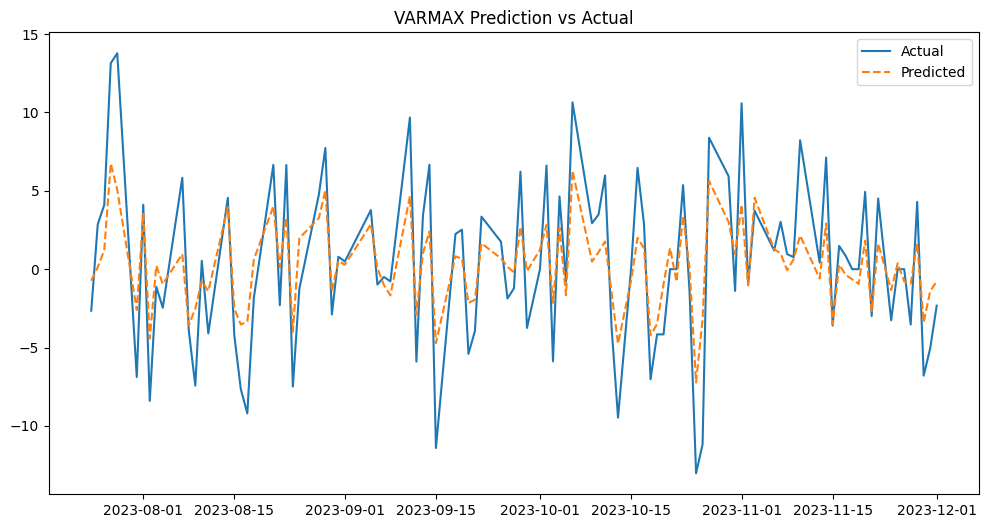

In [ ]:
# Prediction for VARMAX model
varmax_pred = fitted_model.get_forecast(steps=len(X_test), exog=X_test)
varmax_pred_mean = scaler_endog.inverse_transform(varmax_pred.predicted_mean)  # Correct inverse scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], scaler_endog.inverse_transform(y_test)[:, 0], label='Actual')
plt.plot(data.index[-len(y_test):], varmax_pred_mean[:, 0], label='Predicted', linestyle='--')
plt.title('VARMAX Prediction vs Actual')
plt.legend()
plt.show()

#OLS Model(Base model before VARMAX)

Ordinary Least Squares (OLS) is a type of linear regression technique used for estimating the unknown parameters in a linear regression model. It is one of the most basic and commonly used predictive techniques.

Rationale for Choosing OLS:
1. Baseline Comparisons: OLS provides a baseline to assess the impact of ESG factors on stock prices without the complexities of time-series models. This makes it particularly useful for initial exploratory analysis.
2. Simplicity and Transparency: The simplicity of the OLS model allows for clear interpretation and straightforward analysis of the relationship between stock prices and explanatory variables.


In [ ]:
# OLS Model
X_ols = add_constant(X_train)
ols_model = OLS(data_diff['close'].iloc[:split_idx], X_ols)
ols_fitted = ols_model.fit()


In [ ]:
# Predict and evaluate OLS model
X_test_ols = add_constant(X_test)
y_pred_ols = ols_fitted.predict(X_test_ols)

In [ ]:
# Display OLS results and performance metrics
print(ols_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.00e-98
Time:                        10:22:50   Log-Likelihood:                -1029.9
No. Observations:                 402   AIC:                             2076.
Df Residuals:                     394   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1460 

Key Performance Metrics and Results:
1. The model achieved an R-squared of 0.698, indicating that approximately 70% of the variance in the dependent variable (stock price) is predictable from the independent variables.
2. The Adjusted R-squared is 0.692, which adjusts the R-squared value for the number of predictors in the model, showing a strong fit while considering the complexity of the model.
3. With a F-statistic of 129.9 and a corresponding Prob (F-statistic) of 3.00e-98, the model demonstrates that the data provides strong evidence against the null hypothesis, indicating that the model's predictors provide a good fit to the data.


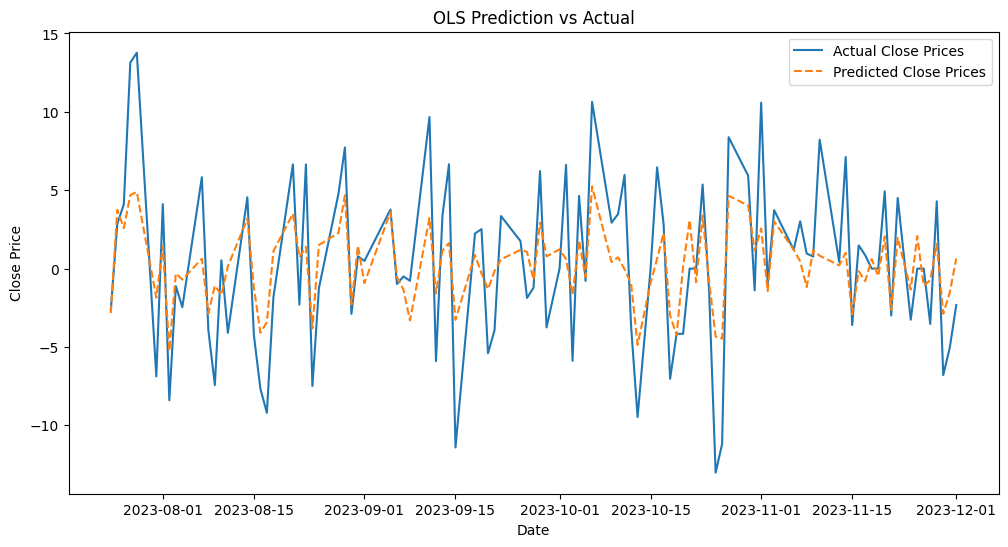

In [ ]:
# Plotting OLS predictions
plt.figure(figsize=(12, 6))
plt.plot(data_diff.index[split_idx:], data_diff['close'].iloc[split_idx:], label='Actual Close Prices')
plt.plot(data_diff.index[split_idx:], y_pred_ols, label='Predicted Close Prices', linestyle='--')
plt.title('OLS Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Conclusion:**
The VARMAX model's superior performance and detailed output support its selection as the most effective among the models discussed. It provides a nuanced understanding of the dynamics affecting stock prices, making it an invaluable tool in the predictive analysis of financial markets, especially when integrating complex variables such as ESG factors.